# CIFAR-10

In [0]:
from matrix_square_root_power import *
from shampoo_optimizer import *
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, Dropout
from keras.layers import AveragePooling2D, Input, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model, Sequential
from keras.datasets import cifar10
from keras import backend
from keras.utils import np_utils
import numpy
from keras.datasets import cifar10
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


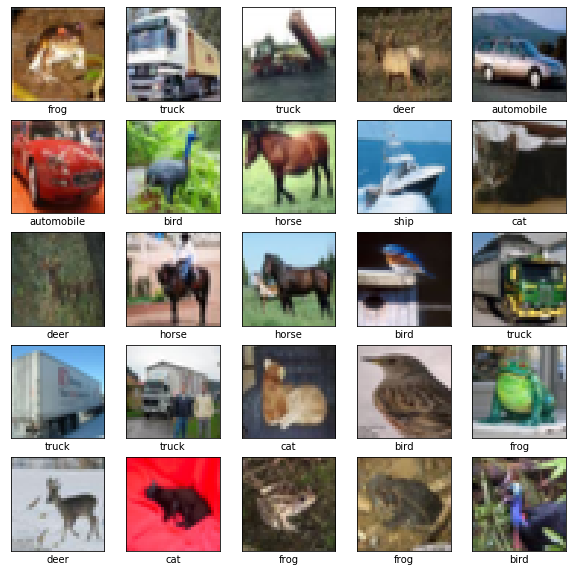

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
num_classes = test_labels.shape[1]

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# Compile model
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [0]:
def loss(model, x, y):
    y_ = model(x)

    return loss_object(y_true=y, y_pred=y_)

def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets)
        return loss_value, tape.gradient(loss_value, model.trainable_weights)

In [0]:
train_images = tf.convert_to_tensor(train_images, dtype=tf.float32)
test_images = tf.convert_to_tensor(test_images, dtype=tf.float32)

## Shampoo, lr = 0.01, eps = 0.0001

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = ShampooOptimizer(learning_rate=0.01)

shampoo_train_loss_results = []
shampoo_train_accuracy_results = []

epochs = 250
batch_size = 128

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 128
    for i in range(train_images.shape[0] // batch_size):
        x = train_images[i*batch_size:i*batch_size+batch_size]
        y = train_labels[i*batch_size:i*batch_size+batch_size]
        # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model(x))

        # End epoch
    shampoo_train_loss_results.append(epoch_loss_avg.result())
    shampoo_train_accuracy_results.append(epoch_accuracy.result())

    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 2.170, Accuracy: 31.901%
Epoch 001: Loss: 2.093, Accuracy: 39.818%
Epoch 002: Loss: 2.066, Accuracy: 42.408%
Epoch 003: Loss: 2.047, Accuracy: 44.447%
Epoch 004: Loss: 2.033, Accuracy: 45.887%
Epoch 005: Loss: 2.021, Accuracy: 46.929%
Epoch 006: Loss: 2.012, Accuracy: 47.742%


KeyboardInterrupt: ignored

## Adam, lr = 0.001

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

adam_train_loss_results = []
adam_train_accuracy_results = []

epochs = 250
batch_size = 128

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 128
    for i in range(train_images.shape[0] // batch_size):
        x = train_images[i:i+batch_size]
        y = train_labels[i:i+batch_size]
        # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model(x))

        # End epoch
    adam_train_loss_results.append(epoch_loss_avg.result())
    adam_train_accuracy_results.append(epoch_accuracy.result())

    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 2.047, Accuracy: 41.488%
Epoch 001: Loss: 1.904, Accuracy: 55.633%
Epoch 002: Loss: 1.792, Accuracy: 66.997%
Epoch 003: Loss: 1.705, Accuracy: 75.563%
Epoch 004: Loss: 1.631, Accuracy: 83.037%
Epoch 005: Loss: 1.605, Accuracy: 85.533%
Epoch 006: Loss: 1.596, Accuracy: 86.324%
Epoch 007: Loss: 1.587, Accuracy: 87.190%
Epoch 008: Loss: 1.577, Accuracy: 88.155%
Epoch 009: Loss: 1.575, Accuracy: 88.321%
Epoch 010: Loss: 1.572, Accuracy: 88.536%
Epoch 011: Loss: 1.572, Accuracy: 88.536%
Epoch 012: Loss: 1.572, Accuracy: 88.556%
Epoch 013: Loss: 1.563, Accuracy: 89.595%
Epoch 014: Loss: 1.556, Accuracy: 90.485%
Epoch 015: Loss: 1.552, Accuracy: 90.911%
Epoch 016: Loss: 1.539, Accuracy: 92.095%
Epoch 017: Loss: 1.538, Accuracy: 92.181%
Epoch 018: Loss: 1.535, Accuracy: 92.422%
Epoch 019: Loss: 1.535, Accuracy: 92.440%
Epoch 020: Loss: 1.532, Accuracy: 92.660%
Epoch 021: Loss: 1.531, Accuracy: 92.843%
Epoch 022: Loss: 1.529, Accuracy: 93.127%
Epoch 023: Loss: 1.528, Accuracy: 

KeyboardInterrupt: 

In [0]:
def plot_metric(optimizer_name, alpha):
    fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
    fig.suptitle('Training Metrics')

    axes[0].set_ylabel("Loss", fontsize=14)
    axes[0].plot(adam_train_loss_results, label = r"{0}, $\alpha = {1}$".format(optimizer_name, alpha))
    axes[0].grid()
    axes[0].legend()

    axes[1].set_ylabel("Accuracy", fontsize=14)
    axes[1].set_xlabel("Epoch", fontsize=14)
    axes[1].plot(adam_train_accuracy_results, label = r"{0}, $\alpha = {1}$".format(optimizer_name, alpha))
    axes[1].grid()
    axes[1].legend()
    plt.show()

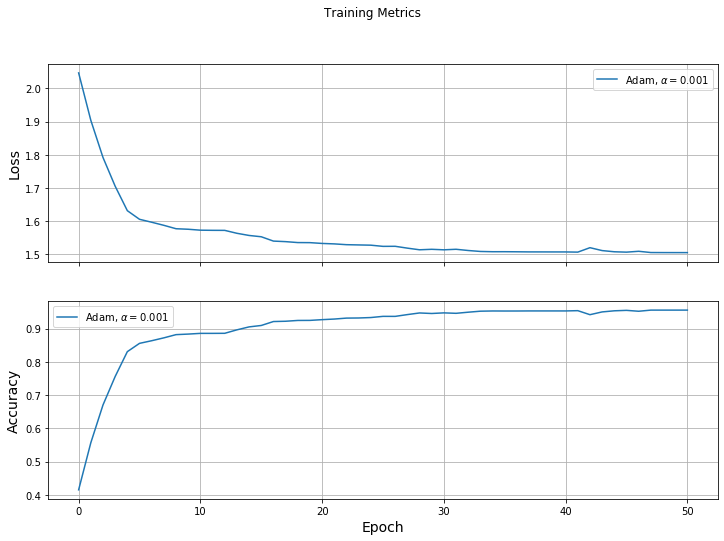

In [0]:
plot_metric("Adam", 0.001)

## Shampoo, lr = 0.001, eps = 0.0001

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = ShampooOptimizer(learning_rate=0.001)

shampoo_train_loss_results = []
shampoo_train_accuracy_results = []

epochs = 250
batch_size = 128

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 128
    for i in range(train_images.shape[0] // batch_size):
        x = train_images[i:i+batch_size]
        y = train_labels[i:i+batch_size]
        # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model(x))

        # End epoch
    shampoo_train_loss_results.append(epoch_loss_avg.result())
    shampoo_train_accuracy_results.append(epoch_accuracy.result())

    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 2.269, Accuracy: 20.180%
Epoch 001: Loss: 2.215, Accuracy: 25.853%
Epoch 002: Loss: 2.193, Accuracy: 27.869%
Epoch 003: Loss: 2.178, Accuracy: 29.307%


KeyboardInterrupt: 

## Shampoo, lr = 0.1, eps = 0.0001

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = ShampooOptimizer(learning_rate=0.1)

shampoo_train_loss_results = []
shampoo_train_accuracy_results = []

epochs = 250
batch_size = 128

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 128
    for i in range(train_images.shape[0] // batch_size):
        x = train_images[i:i+batch_size]
        y = train_labels[i:i+batch_size]
        # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model(x))

        # End epoch
    shampoo_train_loss_results.append(epoch_loss_avg.result())
    shampoo_train_accuracy_results.append(epoch_accuracy.result())

    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 2.330, Accuracy: 13.047%
Epoch 001: Loss: 2.331, Accuracy: 13.041%
Epoch 002: Loss: 2.331, Accuracy: 13.041%
Epoch 003: Loss: 2.136, Accuracy: 32.382%
Epoch 004: Loss: 1.855, Accuracy: 60.471%
Epoch 005: Loss: 1.747, Accuracy: 71.092%
Epoch 006: Loss: 1.707, Accuracy: 74.988%
Epoch 007: Loss: 1.662, Accuracy: 79.651%
Epoch 008: Loss: 1.632, Accuracy: 82.500%
Epoch 009: Loss: 1.626, Accuracy: 83.049%
Epoch 010: Loss: 1.624, Accuracy: 83.171%
Epoch 011: Loss: 1.621, Accuracy: 83.442%
Epoch 012: Loss: 1.619, Accuracy: 83.730%
Epoch 013: Loss: 1.617, Accuracy: 83.840%
Epoch 014: Loss: 1.617, Accuracy: 83.928%
Epoch 015: Loss: 1.616, Accuracy: 83.928%
Epoch 016: Loss: 1.616, Accuracy: 83.928%
Epoch 017: Loss: 1.616, Accuracy: 83.934%
Epoch 018: Loss: 1.616, Accuracy: 84.008%
Epoch 019: Loss: 1.615, Accuracy: 84.016%
Epoch 020: Loss: 1.612, Accuracy: 84.371%
Epoch 021: Loss: 1.610, Accuracy: 84.567%
Epoch 022: Loss: 1.609, Accuracy: 84.685%


KeyboardInterrupt: 

## Shampoo, lr = 0.01, eps = 0.00001 

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = ShampooOptimizer(learning_rate=0.01, epsilon=1e-5)

shampoo_train_loss_results = []
shampoo_train_accuracy_results = []

epochs = 250
batch_size = 128

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 128
    for i in range(train_images.shape[0] // batch_size):
        x = train_images[i:i+batch_size]
        y = train_labels[i:i+batch_size]
        # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model(x))

        # End epoch
    shampoo_train_loss_results.append(epoch_loss_avg.result())
    shampoo_train_accuracy_results.append(epoch_accuracy.result())

    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 2.047, Accuracy: 43.169%
Epoch 001: Loss: 1.945, Accuracy: 51.871%
Epoch 002: Loss: 1.883, Accuracy: 58.011%
Epoch 003: Loss: 1.839, Accuracy: 62.077%
Epoch 004: Loss: 1.820, Accuracy: 63.758%
Epoch 005: Loss: 1.811, Accuracy: 64.357%
Epoch 006: Loss: 1.804, Accuracy: 65.000%
Epoch 007: Loss: 1.793, Accuracy: 66.094%
Epoch 008: Loss: 1.789, Accuracy: 66.418%
Epoch 009: Loss: 1.787, Accuracy: 66.436%
Epoch 010: Loss: 1.787, Accuracy: 66.440%
Epoch 011: Loss: 1.786, Accuracy: 66.442%
Epoch 012: Loss: 1.785, Accuracy: 66.617%
Epoch 013: Loss: 1.781, Accuracy: 67.073%
Epoch 014: Loss: 1.776, Accuracy: 67.544%
Epoch 015: Loss: 1.775, Accuracy: 67.626%
Epoch 016: Loss: 1.774, Accuracy: 67.652%
Epoch 017: Loss: 1.773, Accuracy: 67.756%
Epoch 018: Loss: 1.769, Accuracy: 68.173%
Epoch 019: Loss: 1.768, Accuracy: 68.243%
Epoch 020: Loss: 1.767, Accuracy: 68.371%
Epoch 021: Loss: 1.766, Accuracy: 68.379%
Epoch 022: Loss: 1.765, Accuracy: 68.504%
Epoch 023: Loss: 1.762, Accuracy: 

KeyboardInterrupt: 

## VGG, Adam, too long :(

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(
    weights=None, 
    include_top=True, 
    classes=10,
    input_shape=(32,32,3)
)

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

adam_train_loss_results = []
adam_train_accuracy_results = []

epochs = 250
batch_size = 128

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 128
    for i in range(train_images.shape[0] // batch_size):
        print("i = {0}".format(i))
        x = train_images[i:i+batch_size]
        y = train_labels[i:i+batch_size]
        # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model(x))

        # End epoch
    adam_train_loss_results.append(epoch_loss_avg.result())
    adam_train_accuracy_results.append(epoch_accuracy.result())

    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99
i = 100
i = 101
i = 102
i = 103
i = 104
i = 105
i = 106
i = 107
i = 108
i = 109
i = 110
i = 111
i = 112
i = 113
i = 114
i = 115
i = 116
i = 117
i = 118
i = 119
i = 120
i = 121
i = 122
i = 123
i = 124
i = 125
i = 126
i = 127
i = 128
i = 129
i = 130
i = 131
i = 132
i = 133
i = 134
i = 135
i = 136
i = 137
i = 13

i = 275
i = 276
i = 277
i = 278
i = 279
i = 280
i = 281
i = 282
i = 283
i = 284
i = 285
i = 286
i = 287
i = 288
i = 289
i = 290
i = 291
i = 292
i = 293
i = 294
i = 295
i = 296
i = 297
i = 298
i = 299
i = 300
i = 301
i = 302
i = 303
i = 304
i = 305
i = 306
i = 307
i = 308
i = 309
i = 310
i = 311
i = 312
i = 313
i = 314
i = 315
i = 316
i = 317
i = 318
i = 319
i = 320
i = 321
i = 322
i = 323
i = 324
i = 325
i = 326
i = 327
i = 328
i = 329
i = 330
i = 331
i = 332
i = 333
i = 334
i = 335
i = 336
i = 337
i = 338
i = 339
i = 340
i = 341
i = 342
i = 343
i = 344
i = 345
i = 346
i = 347
i = 348
i = 349
i = 350
i = 351
i = 352
i = 353
i = 354
i = 355
i = 356
i = 357
i = 358
i = 359
i = 360
i = 361
i = 362
i = 363
i = 364
i = 365
i = 366
i = 367
i = 368
i = 369
i = 370


# MNIST

In [0]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

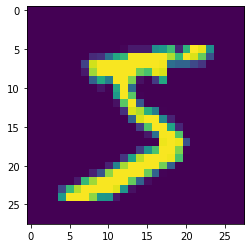

In [0]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_8 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [0]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

In [0]:
def loss(model, x, y, loss_object):
    y_ = model(x)

    return loss_object(y_true=y, y_pred=y_)

def grad(model, inputs, targets, loss_object):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, loss_object)
        return loss_value, tape.gradient(loss_value, model.trainable_weights)

## Adam, lr = 0.001

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

adam_train_loss_results = []
adam_train_accuracy_results = []

epochs = 20
batch_size = 128

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 128
    for i in range(X_train.shape[0] // batch_size):
        x = X_train[i*batch_size:i*batch_size+batch_size]
        y = y_train[i*batch_size:i*batch_size+batch_size]
        # Optimize the model
        loss_value, grads = grad(model, x, y, loss_object)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model(x))

        # End epoch
    adam_train_loss_results.append(epoch_loss_avg.result())
    adam_train_accuracy_results.append(epoch_accuracy.result())

    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 2.029, Accuracy: 43.226%
Epoch 001: Loss: 2.005, Accuracy: 45.663%
Epoch 002: Loss: 2.011, Accuracy: 45.007%
Epoch 003: Loss: 1.997, Accuracy: 46.378%
Epoch 004: Loss: 1.984, Accuracy: 47.743%
Epoch 005: Loss: 2.000, Accuracy: 46.077%
Epoch 006: Loss: 1.986, Accuracy: 47.479%
Epoch 007: Loss: 1.986, Accuracy: 47.466%
Epoch 008: Loss: 1.987, Accuracy: 47.406%
Epoch 009: Loss: 1.982, Accuracy: 47.932%
Epoch 010: Loss: 1.993, Accuracy: 46.807%
Epoch 011: Loss: 2.002, Accuracy: 45.898%
Epoch 012: Loss: 1.988, Accuracy: 47.274%
Epoch 013: Loss: 1.998, Accuracy: 46.356%
Epoch 014: Loss: 1.986, Accuracy: 47.546%
Epoch 015: Loss: 1.985, Accuracy: 47.626%
Epoch 016: Loss: 1.996, Accuracy: 46.565%
Epoch 017: Loss: 1.970, Accuracy: 49.072%
Epoch 018: Loss: 1.940, Accuracy: 52.165%
Epoch 019: Loss: 1.973, Accuracy: 48.788%


## Adam, lr = 0.0001

In [0]:
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.summary()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

adam_train_loss_results = []
adam_train_accuracy_results = []

epochs = 20
batch_size = 128

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 128
    for i in range(X_train.shape[0] // batch_size):
        x = X_train[i*batch_size:i*batch_size+batch_size]
        y = y_train[i*batch_size:i*batch_size+batch_size]
        # Optimize the model
        loss_value, grads = grad(model, x, y, loss_object)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model(x))

        # End epoch
    adam_train_loss_results.append(epoch_loss_avg.result())
    adam_train_accuracy_results.append(epoch_accuracy.result())

    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_10 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
Epoch 000: Loss: 1.815, Accuracy: 65.395%
Epoch 001: Loss: 1.691, Accuracy: 77.412%
Epoch 002: Loss: 1.675, Accuracy: 78.848%
Epoch 003: Loss: 1.584, Accuracy: 87.984%
Epoch 004: Loss: 1.577, Accuracy: 88.640%
Epoch 005: Loss: 1.574, Accuracy: 8

In [0]:
print("MNIST, Adam, lr = 1e-4, loss = {0}".format(np.array(adam_train_loss_results)))
print("MNIST, Adam, lr = 1e-4, loss = {0}".format(np.array(adam_train_accuracy_results)))

MNIST, Adam, lr = 1e-4, loss = [1.8145335 1.690591  1.6748366 1.5842448 1.577013  1.573816  1.5028594
 1.4750677 1.4731829 1.4724473 1.4711263 1.4701109 1.4693774 1.4688377
 1.4680884 1.4680526 1.4671156 1.4672885 1.4667993 1.4663223]
MNIST, Adam, lr = 1e-4, loss = [0.65394634 0.77412194 0.78847826 0.8798411  0.8864016  0.88907254
 0.9610543  0.988131   0.9899339  0.99055153 0.99160326 0.9924379
 0.9931557  0.99352294 0.9939069  0.99407387 0.9949085  0.994775
 0.99509215 0.99537593]


## Shampoo, lr = 0.0001, eps = 0.0001

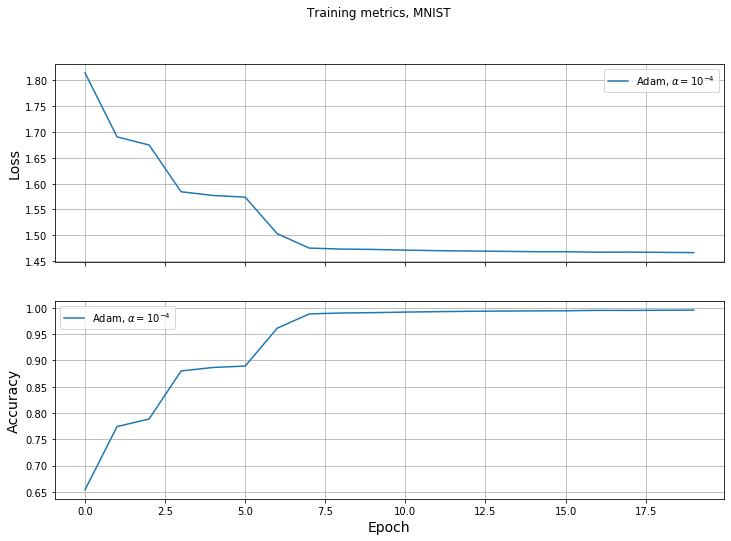

In [0]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training metrics, MNIST')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(adam_train_loss_results, label = r"Adam, $\alpha = 10^{-4}$")
axes[0].grid()
axes[0].legend()

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(adam_train_accuracy_results, label = r"Adam, $\alpha = 10^{-4}$")
axes[1].grid()
axes[1].legend()
plt.show()

In [0]:
model_shampoo = Sequential()
#add model layers
model_shampoo.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model_shampoo.add(Conv2D(32, kernel_size=3, activation="relu"))
model_shampoo.add(Flatten())
model_shampoo.add(Dense(10, activation="softmax"))
model_shampoo.summary()
shampoo_loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
shampoo_optimizer = ShampooOptimizer(learning_rate=1e-4)

shampoo_train_loss_results = []
shampoo_train_accuracy_results = []

epochs = 20
batch_size = 128

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 128
    for i in range(X_train.shape[0] // batch_size):
        x = X_train[i*batch_size:i*batch_size+batch_size]
        y = y_train[i*batch_size:i*batch_size+batch_size]
        # Optimize the model
        loss_value, grads = grad(model_shampoo, x, y, loss_object)
        optimizer.apply_gradients(zip(grads, model_shampoo.trainable_weights))

        # Track progress
        epoch_loss_avg(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        epoch_accuracy(y, model_shampoo(x))

        # End epoch
    shampoo_train_loss_results.append(epoch_loss_avg.result())
    shampoo_train_accuracy_results.append(epoch_accuracy.result())

    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_12 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
Epoch 000: Loss: 2.172, Accuracy: 28.986%
Epoch 001: Loss: 2.099, Accuracy: 36.235%
Epoch 002: Loss: 2.060, Accuracy: 40.154%
Epoch 003: Loss: 2.040, Accuracy: 42.167%
Epoch 004: Loss: 1.924, Accuracy: 53.766%
Epoch 005: Loss: 1.863, Accuracy: 5

In [0]:
print("MNIST, Shampoo, lr = 1e-4, loss = {0}".format(np.array(shampoo_train_loss_results)))
print("MNIST, Shampoo, lr = 1e-4, loss = {0}".format(np.array(shampoo_train_accuracy_results)))

MNIST, Shampoo, lr = 1e-4, loss = [2.172003  2.099343  2.0595424 2.0397482 1.9239646 1.8629755 1.8311121
 1.611945  1.5736517 1.5702567 1.5682428 1.5670635 1.5651836 1.5643921
 1.563798  1.5626973 1.5622683 1.5617087 1.561028  1.54108  ]
MNIST, Shampoo, lr = 1e-4, loss = [0.2898638  0.3623464  0.40154245 0.42167467 0.53766024 0.59713876
 0.6287393  0.85248065 0.8886385  0.89142627 0.893129   0.89401376
 0.8953826  0.89590013 0.8963174  0.8969184  0.89728564 0.89751935
 0.89788663 0.91972154]
